# Environmental Data for Score

## Data Source & Notebook Description
**The QoG Institute Environmental Indicators Dataset**

The Quality of Government Environmental Indicators Dataset (QoG-EI) is a compilation of major freely available indicators measuring environmental performance of countries over time.

Source: Povitkina, Marina, Natalia Alvarado Pachon & Cem Mert Dalli. 2021. The Quality of Government Environmental Indicators Dataset, version Sep21. University of Gothenburg: The Quality of Government Institute, https://www.gu.se/en/quality-government

https://www.gu.se/en/quality-government/qog-data/data-downloads/environmental-indicators-dataset 

## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import sql_functions as sf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#plot Style
sns.set_style("whitegrid")

### Data Loading

In [4]:
qog_df = pd.read_csv('data/qog_ei_sept21.csv', delimiter=';')

/var/folders/lq/66qmb5qs6yx8s8h1s8rmqnh80000gn/T/ipykernel_9359/2356465577.py:1: DtypeWarning: Columns (48,182,262,352,353,356) have mixed types. Specify dtype option on import or set low_memory=False.
  qog_df = pd.read_csv('data/qog_ei_sept21.csv', delimiter=';')


In [5]:
qog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11722 entries, 0 to 11721
Columns: 414 entries, cname to wvs_ploem
dtypes: float64(114), int64(2), object(298)
memory usage: 37.0+ MB


In [6]:
qog_df.columns

Index(['cname', 'ccode', 'year', 'cname_qog', 'ccode_qog', 'ccodealp',
       'ccodealp_year', 'ccodecow', 'ccodevdem', 'cname_year',
       ...
       'wdi_precip', 'wdi_tpa', 'wvs_ameop', 'wvs_ceom', 'wvs_deop',
       'wvs_epmip', 'wvs_epmpp', 'wvs_imeop', 'wvs_pedp', 'wvs_ploem'],
      dtype='object', length=414)

### Choice of indicators based on the criterion that state action is shown

In [7]:
col_of_int = ['ccodealp',
              'year',  
              'ccl_nlegl',
              'epi_bhv', 
              'epi_ghp',
              'epi_cda',
               'epi_msw',
               'epi_pmd',
               'epi_wwt',
               'gg_reperegen'
]

### Description of the variables

- `ccodealp`: Numeric country code based on the International Organization for Standardization (ISO3).
- `year`: Year
- `ccl_nlegl`: Number of climate change laws: Cumulative sum of climate change-related laws or legislative acts (e.g. acts, laws, decree-laws)
- `epi_bhv`: Biodiversity Habitat Index (BHI) estimates the effects of habitat loss, degradation, and fragmentation on the expected retention of terrestrial biodiversity. Original source: Commonwealth Scientific and Industrial Research Organization. When using this variable, please cite both EPI and the original source.
- `epi_ghp`: GHG emissions per capita: EPI calculates greenhouse gas (GHG) emissions per capita for each country in the year 2017. The variable is log-transformed. The unit of measurement is gigagrams (Gg) of CO2-equivalent per person. Original source: Potsdam Institute for Climate Impact Research. When using this variable, please cite both EPI and the original source.
- `epi_cda`: CO2 growth rate: The CO2 (carbon dioxide) growth rate, which makes up 55% of the Climate Change Issue Category,
is calculated as the average annual rate of increase or decrease in raw carbon dioxide emissions.
- `epi_msw`: Controlled solid waste: Controlled solid waste refers to the proportion of household and commercial waste generated in a country that is collected and treated in a manner that controls environmental risks. This metric counts waste as “controlled” if it is treated through recycling, composting, anaerobic digestion, incineration, or disposed of in a sanitary landfill. Original source: Wiedinmyer et al. 2014 & Kaza et al. 2018. When using this variable, please cite both EPI and the original source.
`epi_pmd`: PM2.5 exposure: Ambient particulate matter pollution measured with the number of age-standardized disability-adjusted life-years lost per 100,000 persons (DALY rate) due to exposure to fine air particulate matter smaller than 2.5 micrometers (PM2.5). The variable is log-transformed. Original source: Institute for Health Metrics and Evaluation Transformation. When using this variable, please cite both EPI and the original source.
- `gg_reperegen`: Renewable electricity: The percentage of the national electrical supply generated from renewable sources.


In [8]:
#Selection oft the variables
qog_df = qog_df[col_of_int]

In [9]:
qog_df.head()

,ccodealp,year,ccl_nlegl,epi_bhv,epi_ghp,epi_cda,epi_msw,epi_pmd,epi_wwt,gg_reperegen
0,AFG,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
qog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11722 entries, 0 to 11721
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ccodealp      11722 non-null  object 
 1   year          11722 non-null  int64  
 2   ccl_nlegl     4044 non-null   float64
 3   epi_bhv       4972 non-null   object 
 4   epi_ghp       4998 non-null   object 
 5   epi_cda       4833 non-null   object 
 6   epi_msw       4972 non-null   object 
 7   epi_pmd       4972 non-null   object 
 8   epi_wwt       4937 non-null   object 
 9   gg_reperegen  1663 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 915.9+ KB


### Selection of the requested years

In [11]:
year_of_int = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [12]:
qog_df = qog_df[qog_df['year'].isin(year_of_int)]


In [13]:
qog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 66 to 11535
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ccodealp      1749 non-null   object 
 1   year          1749 non-null   int64  
 2   ccl_nlegl     1687 non-null   float64
 3   epi_bhv       1737 non-null   object 
 4   epi_ghp       1746 non-null   object 
 5   epi_cda       1683 non-null   object 
 6   epi_msw       1737 non-null   object 
 7   epi_pmd       1737 non-null   object 
 8   epi_wwt       1719 non-null   object 
 9   gg_reperegen  889 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 150.3+ KB


In [14]:
qog_df.head(19)
#There are no values for 2021. IT will need an Imputation of the years before.

,ccodealp,year,ccl_nlegl,epi_bhv,epi_ghp,epi_cda,epi_msw,epi_pmd,epi_wwt,gg_reperegen
66,AFG,2012,2.0,"57,70846","98,6730468968722",0,0,"31,6292767746451",0,NaN
67,AFG,2013,2.0,"57,69294",100,0,0,"29,7507993571472",0,NaN
68,AFG,2014,2.0,"57,67742","99,9571261194735",0,0,"27,8723219396497",0,NaN
69,AFG,2015,3.0,"57,6619",100,0,0,"25,9938445221518",0,NaN
70,AFG,2016,3.0,"57,6619",100,0,0,"25,8336802770743",0,NaN
71,AFG,2017,3.0,"57,6619",100,0,0,"25,6735160319969",0,NaN
72,AFG,2018,3.0,"57,6619",100,0,0,"25,5133517869198",0,NaN
73,AFG,2019,3.0,"57,6619",100,0,0,"25,3531875418423",0,NaN
74,AFG,2020,3.0,"57,6619",100,0,0,"25,3531875418423",0,NaN
141,ALB,2012,0.0,"39,99708","60,8393270859163","45,2985916346799",0,"41,9089540544632","2,672",100


### Imputation of the year 2021

In [15]:
#Iterate over each unique country in the original DataFrame and extract the row with the values from the year 2020:
for country in qog_df['ccodealp'].unique():
    row_2020 = qog_df[qog_df['ccodealp'] == country].loc[qog_df['year'] == 2020]
    #Create a new row with the desired values for the year 2021:
    row_2021 = row_2020.copy()
    row_2021['year'] = 2021
    #Append the new row to the new DataFrame:
    qog_df = qog_df.append(row_2021)

In [16]:
#Sort the table by country and year
qog_df = qog_df.sort_values(by=['ccodealp', 'year'])

In [17]:
#Reset the index of the new DataFrame:
qog_df.reset_index(drop=True, inplace=True)

In [18]:
qog_df.head(10)

,ccodealp,year,ccl_nlegl,epi_bhv,epi_ghp,epi_cda,epi_msw,epi_pmd,epi_wwt,gg_reperegen
0,AFG,2012,2.0,"57,70846","98,6730468968722",0,0,"31,6292767746451",0,NaN
1,AFG,2013,2.0,"57,69294",100,0,0,"29,7507993571472",0,NaN
2,AFG,2014,2.0,"57,67742","99,9571261194735",0,0,"27,8723219396497",0,NaN
3,AFG,2015,3.0,"57,6619",100,0,0,"25,9938445221518",0,NaN
4,AFG,2016,3.0,"57,6619",100,0,0,"25,8336802770743",0,NaN
5,AFG,2017,3.0,"57,6619",100,0,0,"25,6735160319969",0,NaN
6,AFG,2018,3.0,"57,6619",100,0,0,"25,5133517869198",0,NaN
7,AFG,2019,3.0,"57,6619",100,0,0,"25,3531875418423",0,NaN
8,AFG,2020,3.0,"57,6619",100,0,0,"25,3531875418423",0,NaN
9,AFG,2021,3.0,"57,6619",100,0,0,"25,3531875418423",0,NaN


In [19]:
qog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ccodealp      1943 non-null   object 
 1   year          1943 non-null   int64  
 2   ccl_nlegl     1873 non-null   float64
 3   epi_bhv       1930 non-null   object 
 4   epi_ghp       1940 non-null   object 
 5   epi_cda       1870 non-null   object 
 6   epi_msw       1930 non-null   object 
 7   epi_pmd       1930 non-null   object 
 8   epi_wwt       1910 non-null   object 
 9   gg_reperegen  889 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 151.9+ KB


In [20]:
#Make a copy
df_env_trans = qog_df.copy()

In [21]:
#Change the datatype of the year and rename the country column
df_env_trans['year'] = pd.to_datetime(df_env_trans['year'], format='%Y', errors='coerce')
df_env_trans = df_env_trans.rename(columns={'ccodealp':'iso3'})

In [22]:
#List of the iso3 codes of the 193 un members
from country_iso_dict import list_off


In [23]:
df_env_trans['iso3'].nunique()

195

In [24]:
df_env_trans = df_env_trans[df_env_trans['iso3'].isin(list_off)]

In [25]:
df_env_trans['iso3'].nunique()

193

In [26]:
df_env_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1942
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   iso3          1930 non-null   object        
 1   year          1930 non-null   datetime64[ns]
 2   ccl_nlegl     1863 non-null   float64       
 3   epi_bhv       1920 non-null   object        
 4   epi_ghp       1930 non-null   object        
 5   epi_cda       1860 non-null   object        
 6   epi_msw       1920 non-null   object        
 7   epi_pmd       1920 non-null   object        
 8   epi_wwt       1900 non-null   object        
 9   gg_reperegen  889 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 165.9+ KB


In [27]:
#List of the numeric columns
col_num = ['ccl_nlegl',
            'epi_bhv', 
            'epi_ghp',
            'epi_cda',
            'epi_msw',
            'epi_pmd',
            'epi_wwt',
            'gg_reperegen']

In [28]:
# Replace comma with point in string
for i in col_num:
    df_env_trans[i] = df_env_trans[i].astype(str).str.replace(',', '.')

In [29]:
#Change the datatype to float
for i in col_num:
    df_env_trans[i] = df_env_trans[i].astype(float)

In [30]:
df_env_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1942
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   iso3          1930 non-null   object        
 1   year          1930 non-null   datetime64[ns]
 2   ccl_nlegl     1863 non-null   float64       
 3   epi_bhv       1920 non-null   float64       
 4   epi_ghp       1930 non-null   float64       
 5   epi_cda       1860 non-null   float64       
 6   epi_msw       1920 non-null   float64       
 7   epi_pmd       1920 non-null   float64       
 8   epi_wwt       1900 non-null   float64       
 9   gg_reperegen  889 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 165.9+ KB


In [31]:
from transform_esg import interpol
from transform_esg import per_null

In [32]:
#Inerpolation of missing values
df_env_imp = interpol(df_env_trans, col_num)

In [33]:
per_null(df_env_trans)

iso3             0.000000
year             0.000000
ccl_nlegl        1.036269
epi_bhv          0.518135
epi_ghp          0.000000
epi_cda          3.626943
epi_msw          0.518135
epi_pmd          0.518135
epi_wwt          1.554404
gg_reperegen    29.533679
dtype: float64


In [34]:
per_null(df_env_imp)

iso3             0.000000
year             0.000000
ccl_nlegl        1.036269
epi_bhv          0.518135
epi_ghp          0.000000
epi_cda          3.626943
epi_msw          0.518135
epi_pmd          0.518135
epi_wwt          1.554404
gg_reperegen    29.533679
dtype: float64


In [35]:
def minmax_scale(df, lst_ind): 
    # Select the columns to be scaled
    columns_to_scale = lst_ind

    # Create the MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(0, 10))

    # Group the DataFrame by year
    grouped_data = df.groupby('year')

    # Apply the MinMax scaling for each year
    scaled_data = pd.DataFrame()
    for year, group in grouped_data:
        scaled_values = scaler.fit_transform(group[columns_to_scale])
        group[columns_to_scale] = scaled_values
        scaled_data = scaled_data.append(group)

    # Reset the index of the scaled DataFrame
    scaled_data.reset_index(drop=True, inplace=True)
    return scaled_data

In [36]:
df_env_scaled = minmax_scale(df_env_imp, col_num)

In [37]:
df_env_scaled.describe()

,ccl_nlegl,epi_bhv,epi_ghp,epi_cda,epi_msw,epi_pmd,epi_wwt,gg_reperegen
count,1910.000000,1920.000000,1930.000000,1860.000000,1920.000000,1920.000000,1900.000000,1360.000000
mean,1.695587,5.367067,5.098237,4.138278,3.663415,4.226269,2.224357,3.440144
std,1.697531,2.048773,2.820320,2.101558,3.596390,2.203333,3.266526,3.115694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,3.872400,2.975372,2.665196,0.000000,2.597868,0.002000,0.791058
50%,1.304348,5.128112,5.198746,4.231273,2.753244,4.030369,0.307500,2.456077
75%,2.500000,6.833387,7.381176,5.760287,7.239159,5.383753,4.195800,5.864774
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [38]:
#choose the columns with a negativ relation
columns_recip = ['epi_ghp', 
                 'epi_pmd',
                 ]
#transform the values in reciproce
df_env_scaled[columns_recip] = 10-df_env_scaled[columns_recip]

In [39]:
df_env_scaled.describe()

,ccl_nlegl,epi_bhv,epi_ghp,epi_cda,epi_msw,epi_pmd,epi_wwt,gg_reperegen
count,1910.000000,1920.000000,1930.000000,1860.000000,1920.000000,1920.000000,1900.000000,1360.000000
mean,1.695587,5.367067,4.901763,4.138278,3.663415,5.773731,2.224357,3.440144
std,1.697531,2.048773,2.820320,2.101558,3.596390,2.203333,3.266526,3.115694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,3.872400,2.618824,2.665196,0.000000,4.616247,0.002000,0.791058
50%,1.304348,5.128112,4.801254,4.231273,2.753244,5.969631,0.307500,2.456077
75%,2.500000,6.833387,7.024628,5.760287,7.239159,7.402132,4.195800,5.864774
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [40]:
def score(df, lst_ind):
    # Calculate the score by summing the scaled values and divided by the number of indicators
    df['score'] = df[lst_ind].sum(axis=1)/len(lst_ind)
    # Round the score to two decimal places (adjust the number inside round() as needed)
    df['score'] = df['score'].round(2)
    return df

In [41]:
df_env_score = score(df_env_scaled, col_num)

In [42]:
df_env_score[df_env_score['iso3']=='RUS']

,iso3,year,ccl_nlegl,epi_bhv,epi_ghp,epi_cda,epi_msw,epi_pmd,epi_wwt,gg_reperegen,score
146,RUS,2012-01-01,0.500000,9.525032,9.282544,5.079825,0.3195,6.690211,1.85,1.556373,4.35
339,RUS,2013-01-01,0.500000,9.516665,9.217613,5.023827,0.3195,6.462804,1.85,1.717463,4.33
532,RUS,2014-01-01,0.476190,9.508305,9.061346,5.172003,0.3195,6.235396,1.85,1.656825,4.28
725,RUS,2015-01-01,0.454545,9.499952,8.978974,5.421936,0.3195,6.007989,1.85,1.585579,4.26
918,RUS,2016-01-01,0.454545,9.499952,9.020475,5.537357,0.3195,5.834132,1.85,1.705320,4.28
1111,RUS,2017-01-01,0.454545,9.499952,9.080009,5.691977,0.3195,5.660276,1.85,1.705136,4.28
1304,RUS,2018-01-01,0.454545,9.499952,9.080009,5.691977,0.3195,5.486420,1.85,1.734062,4.26
1497,RUS,2019-01-01,0.454545,9.499952,9.080009,5.691977,0.3195,5.312563,1.85,1.734062,4.24
1690,RUS,2020-01-01,0.434783,9.499952,9.080009,5.691977,0.3195,5.312563,1.85,1.734062,4.24
1883,RUS,2021-01-01,0.434783,9.499952,9.080009,5.691977,0.3195,5.312563,1.85,1.734062,4.24


<Axes: ylabel='Frequency'>

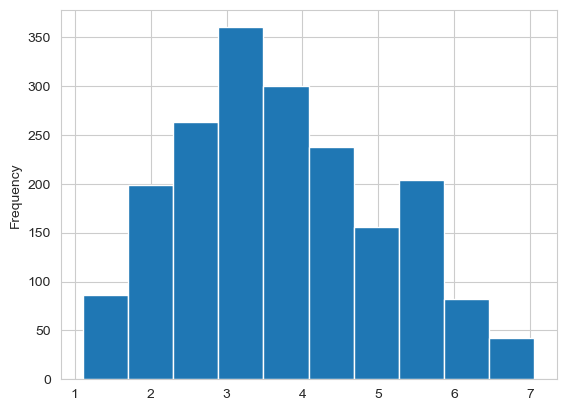

In [43]:
df_env_score['score'].plot(kind='hist')

In [44]:
print(df_env_score.shape)

(1930, 11)


In [45]:
df_env_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   iso3          1930 non-null   object        
 1   year          1930 non-null   datetime64[ns]
 2   ccl_nlegl     1910 non-null   float64       
 3   epi_bhv       1920 non-null   float64       
 4   epi_ghp       1930 non-null   float64       
 5   epi_cda       1860 non-null   float64       
 6   epi_msw       1920 non-null   float64       
 7   epi_pmd       1920 non-null   float64       
 8   epi_wwt       1900 non-null   float64       
 9   gg_reperegen  1360 non-null   float64       
 10  score         1930 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 166.0+ KB


In [46]:
def drop_ind(df, lst_ind):
    df = df.drop(lst_ind, axis=1)
    return df

In [47]:
df_env_scr = drop_ind(df_env_score, col_num)

In [48]:
df_env_scr = df_env_scr.rename(columns={'score':'env_score'})

In [49]:
df_env_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   iso3       1930 non-null   object        
 1   year       1930 non-null   datetime64[ns]
 2   env_score  1930 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 45.4+ KB


In [50]:
print(df_env_scr.head(10))

  iso3       year  env_score
0  AFG 2012-01-01       1.72
1  AGO 2012-01-01       3.07
2  ALB 2012-01-01       3.41
3  AND 2012-01-01       3.89
4  ARE 2012-01-01       5.16
5  ARG 2012-01-01       4.26
6  ARM 2012-01-01       3.04
7  ATG 2012-01-01       3.26
8  AUS 2012-01-01       5.78
9  AUT 2012-01-01       6.58


In [51]:
env_score = ['env_score']

In [52]:
df_env_scr = minmax_scale(df_env_scr, env_score)

In [53]:
df_env_scr = df_env_scr.sort_values(by=['iso3', 'year'], ascending=[True, True]).reset_index(drop=True)

In [54]:
df_env_scr

,iso3,year,env_score
0,AFG,2012-01-01,0.492424
1,AFG,2013-01-01,0.606061
2,AFG,2014-01-01,0.813309
3,AFG,2015-01-01,1.054545
4,AFG,2016-01-01,1.152482
...,...,...,...
1925,ZWE,2017-01-01,3.220911
1926,ZWE,2018-01-01,3.204047
1927,ZWE,2019-01-01,3.198653
1928,ZWE,2020-01-01,3.203390


In [55]:
df_env_scr[df_env_scr['iso3'] == 'NOR']

,iso3,year,env_score
1290,NOR,2012-01-01,10.000000
1291,NOR,2013-01-01,10.000000
1292,NOR,2014-01-01,9.963031
1293,NOR,2015-01-01,9.981818
1294,NOR,2016-01-01,10.000000
1295,NOR,2017-01-01,10.000000
1296,NOR,2018-01-01,10.000000
1297,NOR,2019-01-01,10.000000
1298,NOR,2020-01-01,10.000000
1299,NOR,2021-01-01,10.000000


In [56]:
df_env_scr[df_env_scr['env_score'] > 9.5].sort_values(by='env_score', ascending=False)

,iso3,year,env_score
1299,NOR,2021-01-01,10.000000
1290,NOR,2012-01-01,10.000000
92,AUT,2014-01-01,10.000000
1298,NOR,2020-01-01,10.000000
1297,NOR,2019-01-01,10.000000
1296,NOR,2018-01-01,10.000000
473,DNK,2015-01-01,10.000000
1295,NOR,2017-01-01,10.000000
1294,NOR,2016-01-01,10.000000
1291,NOR,2013-01-01,10.000000


## Save DataFrame

In [57]:
df_env_scr.to_csv('data/df_env_scr')

## Upload to postgres-Sever

In [58]:
import psycopg2

In [59]:
schema = 'capstone_travel_index'
engine = sf.get_engine()

In [60]:
# table_name = 'df_env_scr'

# if engine!=None:
#     try:
#         df_env_scr.to_sql(name=table_name, # Name of SQL table
#                         con=engine, # Engine or connection
#                         if_exists='replace', # Drop the table before inserting new values 
#                         schema=schema, # Use schmea that was defined earlier
#                         index=False, # Write DataFrame index as a column
#                         chunksize=5000, # Specify the number of rows in each batch to be written at a time
#                         method='multi') # Pass multiple values in a single INSERT clause
#         print(f"The {table_name} table was imported successfully.")
#     # Error handling
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#         engine = None